# importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# importing dataset

In [2]:
data=pd.read_csv(r'D:\ict\titanic_dataset.csv')

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
data['Name'].nunique()

891

In [7]:
data.shape

(891, 12)

In [8]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# filling missing values

In [9]:
data['Age']=data['Age'].fillna(data['Age'].median())
data['Cabin']=data['Cabin'].fillna(data['Cabin'].mode()[0])
data['Embarked']=data['Embarked'].fillna(data['Embarked'].mode()[0])

In [10]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [11]:
data=data.drop(['Name','Ticket','PassengerId'],axis=1)

In [12]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,B96 B98,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,B96 B98,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,B96 B98,S


# transforming

In [13]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
data['Sex']=labelencoder.fit_transform(data['Sex'])
data['Cabin']=labelencoder.fit_transform(data['Cabin'])
data['Embarked']=labelencoder.fit_transform(data['Embarked'])

In [14]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,1,22.0,1,0,7.2500,47,2
1,1,1,0,38.0,1,0,71.2833,81,0
2,1,3,0,26.0,0,0,7.9250,47,2
3,1,1,0,35.0,1,0,53.1000,55,2
4,0,3,1,35.0,0,0,8.0500,47,2


<AxesSubplot:>

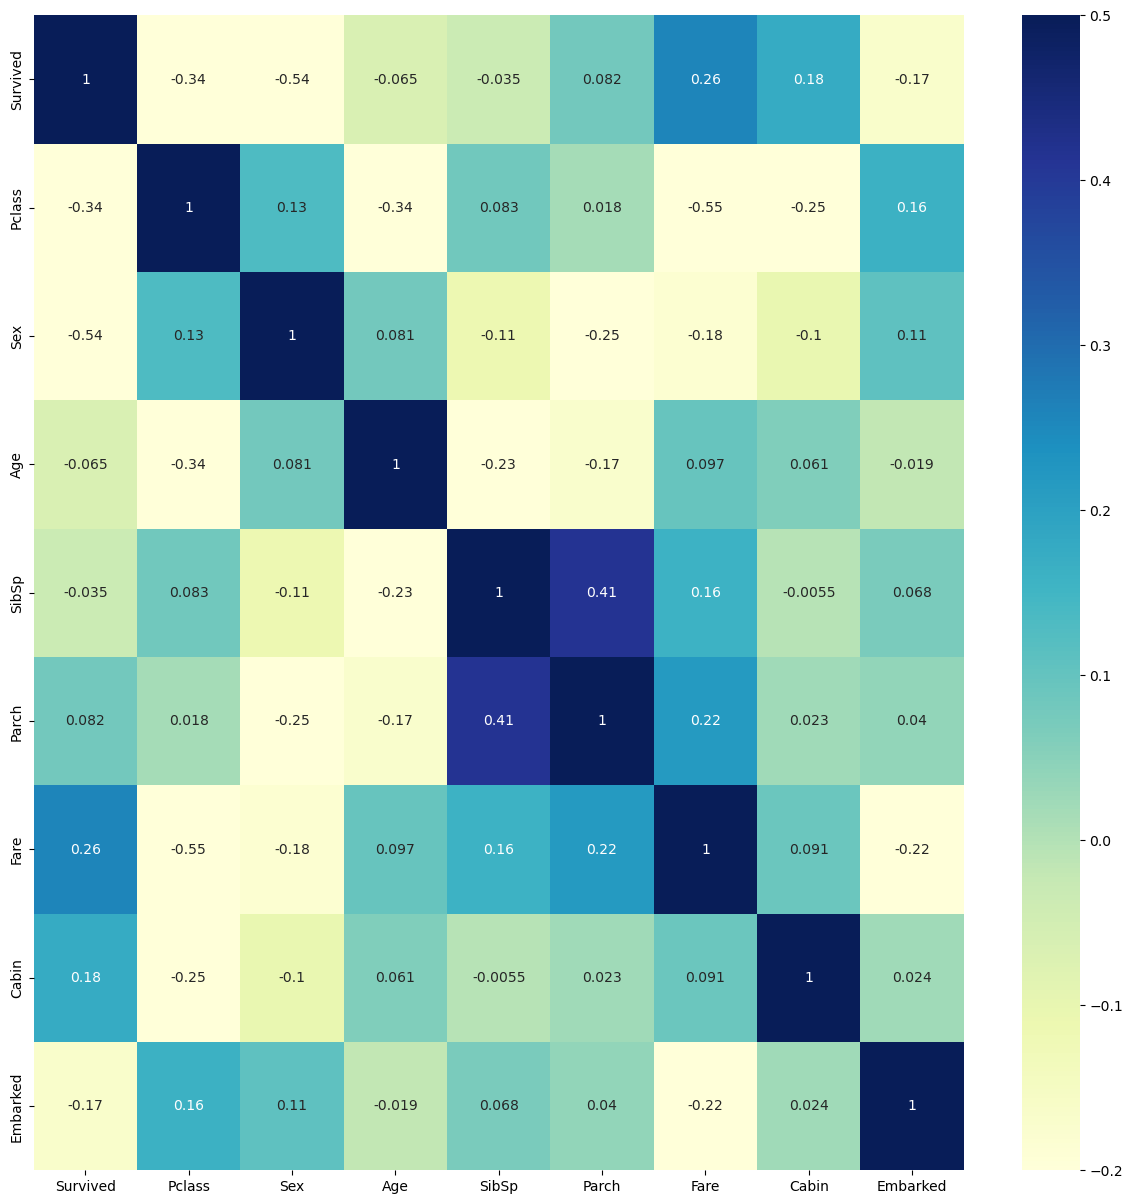

In [18]:
corrmatrix=data.corr()
plt.subplots(figsize=(15,15))
sns.heatmap(corrmatrix,vmax=0.5,vmin=-0.2,annot=True,cmap='YlGnBu')  # annot gives value

# scaling

In [20]:
from sklearn.preprocessing import StandardScaler
stdscaler=StandardScaler()
q=data['Survived']
data=data.drop('Survived',axis=1)
data= stdscaler.fit_transform(data)


In [21]:
data=pd.DataFrame(data)
data=pd.concat([q,data],axis=1)
data.columns=['Survived','Pclass','Sex','Age','SibSp','Parch','Fare','Cabin','Embarked']
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,0.827377,0.737695,-0.565736,0.432793,-0.473674,-0.502445,-0.281881,0.585954
1,1,-1.566107,-1.355574,0.663861,0.432793,-0.473674,0.786845,1.161545,-1.942303
2,1,0.827377,-1.355574,-0.258337,-0.474545,-0.473674,-0.488854,-0.281881,0.585954
3,1,-1.566107,-1.355574,0.433312,0.432793,-0.473674,0.420730,0.057748,0.585954
4,0,0.827377,0.737695,0.433312,-0.474545,-0.473674,-0.486337,-0.281881,0.585954


# x,y split

In [22]:
x=data.drop('Survived',axis=1)
y=data['Survived']

# tarin test split

In [23]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

# KNN model

C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to 

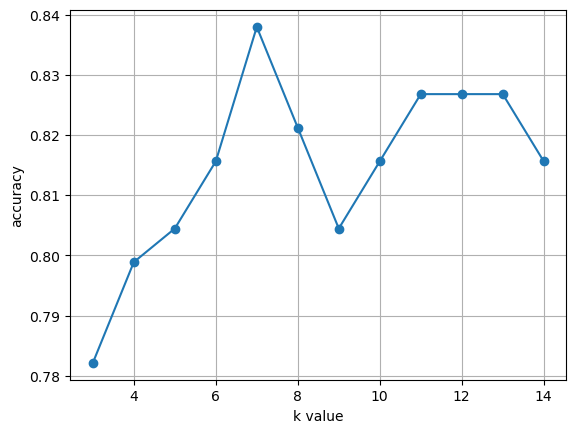

In [25]:
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.neighbors import KNeighborsClassifier
metric_k=[]
neighbors=np.arange(3,15)
for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=k,metric='euclidean')
    classifier.fit(x_train,y_train)
    y_pred=classifier.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    metric_k.append(acc)
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')
plt.grid()

In [29]:
classifier=KNeighborsClassifier(n_neighbors=7,metric='euclidean')
knnmodel=classifier.fit(x_train,y_train)

# SVM model

In [30]:
from sklearn.svm import SVC
#linear SVM
svmcls=SVC(kernel='linear')
svmcls=svmcls.fit(x_train,y_train)

# k fold cross validation

In [41]:
from sklearn.model_selection import KFold
kfold_validator=KFold(10)
from sklearn.model_selection import cross_val_score
cv_result=cross_val_score(knnmodel,x,y,cv=kfold_validator)
cv_result1=cross_val_score(svmcls,x,y,cv=kfold_validator)
kfoldknn=np.mean(cv_result)
kfoldlsvm=np.mean(cv_result1)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to 

In [43]:
print('average accuracy score of KNN model is ',kfoldknn)
print('average accuracy score of linear SVM model is ',kfoldlsvm)

average accuracy score of KNN model is  0.8069662921348314
average accuracy score of linear SVM model is  0.786729088639201


# stratified cross validation

In [45]:
from sklearn.model_selection import StratifiedKFold
skfold_validator=StratifiedKFold(n_splits=10)
skcv_result1=cross_val_score(knnmodel,x,y,cv=skfold_validator)
skcv_result2=cross_val_score(svmcls,x,y,cv=skfold_validator)
sfoldknn=np.mean(skcv_result1)
sfoldsvm=np.mean(skcv_result2)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to 

In [47]:
print('average accuracy score of KNN model is ',sfoldknn)
print('average accuracy score of linear SVM model is ',sfoldsvm)

average accuracy score of KNN model is  0.8103495630461923
average accuracy score of linear SVM model is  0.786729088639201
